In [1]:
import pandas as pd 
import numpy as np

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_excel ('gas-turbine.xlsx')
display(df)
X = np.array(df[['t_in_comp','t_housing_comp','t_housing2_turb','t_housing4_turb','t_out_turb','gas_fuel_flow','gas_fuel_pres','liq_fuel_flow','liq_fuel_pres']])
y = np.array(df[['real_power','app_power','react_power']])
display(X)
display(y)

,Unnamed: 0,t_in_comp,t_housing_comp,t_housing2_turb,t_housing4_turb,t_housing6_turb,t_out_turb,gas_fuel_flow,gas_fuel_pres,liq_fuel_flow,liq_fuel_pres,real_power,app_power,react_power
0,0,26.1,280.0,293,285,278,256.0,449,24.0,0.0,0.31,450.0,523,271.0
1,1,25.7,282.0,294,285,278,257.0,452,23.6,0.0,0.31,468.0,565,291.0
2,2,25.5,279.0,295,285,280,256.0,456,24.0,0.0,0.32,472.0,555,295.0
3,3,25.4,277.0,292,284,277,255.0,454,24.3,0.0,0.32,453.0,539,277.0
4,4,25.4,277.0,292,284,277,255.0,454,24.3,0.0,0.32,503.0,539,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,2941,1250.0,545.0,554,563,530,530.0,997,24.3,0.0,0.12,3629.0,3835,1245.0
2942,2942,1250.0,520.0,534,536,503,503.0,953,24.1,0.0,0.12,3400.0,3589,1162.0
2943,2943,1250.0,582.0,541,553,516,516.0,979,24.2,0.0,0.13,3533.0,3758,1238.0
2944,2944,1250.0,385.0,392,384,371,371.0,668,24.5,0.0,0.11,1821.0,1977,784.0


array([[2.61e+01, 2.80e+02, 2.93e+02, ..., 2.40e+01, 0.00e+00, 3.10e-01],
       [2.57e+01, 2.82e+02, 2.94e+02, ..., 2.36e+01, 0.00e+00, 3.10e-01],
       [2.55e+01, 2.79e+02, 2.95e+02, ..., 2.40e+01, 0.00e+00, 3.20e-01],
       ...,
       [1.25e+03, 5.82e+02, 5.41e+02, ..., 2.42e+01, 0.00e+00, 1.30e-01],
       [1.25e+03, 3.85e+02, 3.92e+02, ..., 2.45e+01, 0.00e+00, 1.10e-01],
       [1.25e+03, 3.82e+02, 3.88e+02, ..., 2.42e+01, 0.00e+00, 1.30e-01]])

array([[ 450.,  523.,  271.],
       [ 468.,  565.,  291.],
       [ 472.,  555.,  295.],
       ...,
       [3533., 3758., 1238.],
       [1821., 1977.,  784.],
       [1765., 1950.,  850.]])

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

clf = MLPRegressor(max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train)

mse_train_test = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_train_test)

r2train = r2_score(y_train, y_train_predict)
r2test = r2_score(y_test, y_test_predict)
print("R2 Training: ", r2train)
print("R2 Test: ", r2test)

el error de entrenamiento es MSE =  470656.9953806002
el error de test es MSE =  73411.73331479805
R2 Training:  0.6062567592702743
R2 Test:  0.8731210103622417


In [3]:
resultado = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

    clf = MLPRegressor(max_iter=1000, random_state=i)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_train_test = mean_squared_error(y_test, y_test_predict)
    resultado.append([i, mse_train, mse_train_test])
resultado = np.array(resultado)

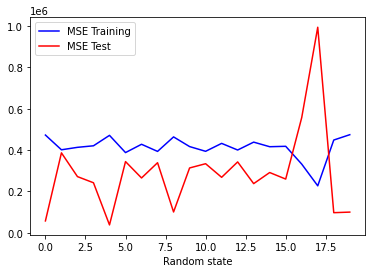

In [4]:
import matplotlib.pyplot as plt
xd = np.arange(20)
plt.plot(xd, resultado[:,1], color='blue')
plt.plot(xd, resultado[:,2], color='red')
plt.xlabel('Random state')
plt.legend(["MSE Training", "MSE Test"])
plt.show()

In [5]:
#ejercicio 3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
resultado = []

for i in range(7):
    capas = [50]*i
    clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=capas, random_state=0)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_train_test = mean_squared_error(y_test, y_test_predict)
    res = [i, mse_train, mse_train_test]
    resultado.append(res)
    display(res)
resultado = np.array(resultado)


[0, 415568.37524006685, 629083.5871646826]

[1, 344884.7146529554, 559482.177465456]

[2, 335449.62130615005, 550304.1706651015]

[3, 336529.21950120607, 553863.7391405118]

[4, 346010.4773889114, 562609.4830313538]

[5, 335970.39189194026, 553554.508802188]

[6, 339663.3128141764, 550403.5527705008]

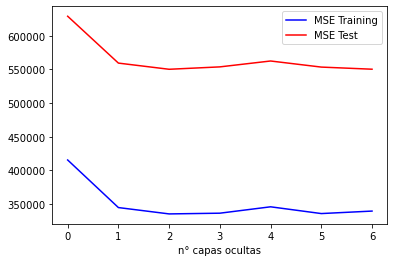

In [6]:
import matplotlib.pyplot as plt
xd = np.arange(7)
plt.plot(xd, resultado[:,1], color='blue')
plt.plot(xd, resultado[:,2], color='red')
plt.xlabel('n° capas ocultas')
plt.legend(["MSE Training", "MSE Test"])
plt.show()

In [7]:
#ejercicio 4
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = MLPRegressor(random_state=0)
clf.fit(X_train_scaled,y_train)
parameters = {'max_iter':[20000, 100000], 'hidden_layer_sizes':[(), (6)], 'activation':('identity', 'tanh'), 'alpha':[0.01, 1],'batch_size':[1,10]}
gridcv = GridSearchCV(clf, parameters, scoring='neg_mean_squared_error', cv=2)
gridcv.fit(X_train_scaled, y_train)
y_train_predict = gridcv.predict(X_train_scaled)
y_test_predict = gridcv.predict(X_test_scaled)